# Liver Disease Prediction using Logistic Regression

### Data Set Information:

ILPD (Indian Liver Patient Dataset) Data Set:

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".


Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)



# 1. Importing necessary Libraries

In [126]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from datetime import datetime

# Pretty display for notebooks
# %matplotlib inline

liver_data = pd.read_csv('indian_liver_patient.csv')


# 2.Exploratory Data Analysis

In [85]:
# Success - Display the first record
display(liver_data.head(n=5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [86]:
# Looking for missing values in the dataset
liver_data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [87]:
liver_data['Albumin_and_Globulin_Ratio'].fillna((liver_data['Albumin_and_Globulin_Ratio'].mean()), inplace=True)

In [88]:
liver_data['Gender']=liver_data['Gender'].replace({'Male':0.0,'Female':1.0})

In [89]:
list(liver_data.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [90]:
liver_data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [91]:
liver_data.shape

(583, 11)

In [119]:
liver_data[:1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,1.0,0.7,0.1,187,16,18,6.8,3.3,0.9,1,yes


In [103]:
liver_data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [104]:
# Success - Display the first record
display(liver_data.head(n=5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,1.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,0.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,0.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,0.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,0.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes


In [105]:
list(liver_data.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset',
 'HasDisease']

In [106]:
y = liver_data['Dataset'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [95]:
# create a column based on dataset to see if a patient has disease or not
def label_disease(liver_data):
    if liver_data["Dataset"] == 1:
        return 'yes'
    return 'no'

liver_data['HasDisease'] = liver_data.apply(lambda liver_data: label_disease(liver_data), axis=1)

In [96]:
Feature = liver_data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [107]:
X = Feature
y = liver_data['HasDisease'].values
y[0:5]

array(['yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [108]:
X = Feature
y = liver_data['Dataset'].values
y[0:5]

array([1, 1, 1, 1, 1])

# 3.Splitting Data into Train and Test

In [109]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=27)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
X_test[:5]

array([[-0.58349119,  1.78939182, -0.37296974, -0.41638457, -0.56347251,
        -0.35773633, -0.32407517,  1.3886971 ,  1.08095795,  0.15819831],
       [ 1.55290904, -0.5588491 , -0.37296974, -0.4528276 , -0.29831586,
        -0.28488881, -0.29660331,  0.35964408, -0.20793325, -0.78072961],
       [ 0.35903832, -0.5588491 ,  0.63032137,  0.78623548,  6.05148805,
         0.05506628, -0.15924404, -0.8565095 , -1.11015709, -1.09370558],
       [-0.14364409, -0.5588491 , -0.09079411, -0.05195425, -0.27970838,
        -0.11491126,  0.23909787,  0.45319435,  0.04984499, -0.46775364],
       [ 0.10769712,  1.78939182,  1.7119946 ,  2.31684282,  0.44133162,
        -0.24846505, -0.11460227, -2.07266307, -1.49682444, -0.46775364]])

# 4. Fitting a Logistic Regression Model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
Y_pred=log_model.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7191780821917808

# 5. Evaluating model Performance

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score
confusion_matrix(Y_test,Y_pred)

array([[95,  7],
       [34, 10]])

Text(0.5, 1.0, 'Logistic Regression')

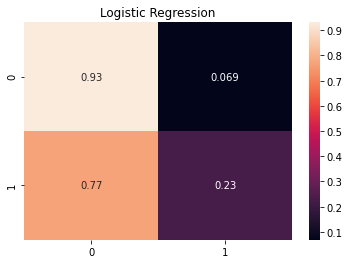

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(Y_test,Y_pred,normalize='true'),annot=True)
plt.title('Logistic Regression')

# 6. Deploying Model

In [115]:
import pickle
pickle.dump(log_model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

#Open dumpfile and Predict
model_scaler = pickle.load(open('scaler.pkl', 'rb'))
model_pickle = pickle.load(open('model.pkl', 'rb'))


# 7. Prediction Using Model

In [125]:
predict_input = model_scaler.transform([[17,1,0.7,0.2,145,18,36,7.2,3.9,1.18]])
predict = model_pickle.predict(predict_input)
if (predict == 1):
    print("Has liver disease")
else:
    print("Has no liver disease")

Has no liver disease


# 8. Summary of Model

In [129]:
import math                 
                  
serum_creatinine = 1.2
serum_bilirubin = 1.8
inr = 1.1
sodium = 138


meld_score = 3.78 * math.log(serum_bilirubin) + 11.2 * math.log(inr) + 9.57 * math.log(serum_creatinine) + 6.43

print(round(meld_score))

11
